In [1]:
#importing all the libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#importing the dataset with features, creating dataframe
df = pd.read_csv (r"C:/Users/fairu/Desktop/dataset/final sets/feature_LSTM_all_final set.csv")

# Set the random seeds for replicating results over multiple runs.
np.random.seed(0)
median_num_frames = (df.shape[1]-1)//16

In [2]:
median_num_frames

110

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
0,-278.097046,-198.765060,-200.933746,-190.464462,-189.236176,-194.204040,-197.067902,-209.137146,-224.663147,-226.126816,...,0.131752,0.086171,0.056403,0.116931,0.202630,0.204342,0.141700,0.132581,0.152661,3
1,-417.248321,-400.952148,-389.697754,-397.997009,-395.542847,-343.507721,-219.062790,-155.594513,-129.342926,-122.111870,...,0.024257,0.022665,0.020463,0.017958,0.015344,0.012966,0.011236,0.010534,0.010319,1
2,-385.742981,-379.821472,-370.021271,-366.498566,-370.260590,-378.948639,-376.894714,-343.313293,-303.976135,-309.479431,...,0.035354,0.041579,0.045775,0.044876,0.042665,0.042250,0.039398,0.053144,0.065563,4
3,-191.519547,-207.359497,-232.245926,-220.253921,-227.390594,-227.627411,-229.298447,-228.655685,-229.767120,-235.602005,...,0.256767,0.213257,0.258546,0.272548,0.253565,0.245278,0.240122,0.236931,0.259200,3
4,-584.240601,-577.195923,-584.210449,-569.129456,-572.596619,-576.043823,-571.574524,-579.032471,-586.268616,-554.947632,...,0.004447,0.004639,0.003549,0.003272,0.003099,0.002999,0.003078,0.003679,0.004518,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15142,-377.351502,-377.036713,-378.425385,-374.433563,-369.554871,-367.246063,-365.987274,-362.311127,-365.599243,-360.222473,...,0.022871,0.022589,0.019628,0.015488,0.016094,0.017379,0.017063,0.016754,0.016749,2
15143,-176.108643,-145.880783,-127.649010,-139.385223,-127.951088,-131.452179,-150.221451,-146.630783,-140.116806,-151.603561,...,0.149900,0.128919,0.137280,0.173567,0.171415,0.133078,0.115375,0.130625,0.134144,3
15144,-322.956390,-355.374664,-369.923859,-369.795960,-342.795715,-285.547058,-262.819092,-266.844849,-254.688522,-240.103592,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
15145,-287.760956,-310.012634,-303.392944,-305.117584,-306.301178,-267.989624,-281.547882,-276.807678,-248.752670,-249.832642,...,0.071319,0.091614,0.087282,0.061181,0.047276,0.046632,0.047125,0.048253,0.062012,1


In [4]:
#Seperating the features and targets
X = df.iloc[0:15148, list(range(16*median_num_frames))].values
y = df.iloc[0:15148, 16*median_num_frames].values

# Split and stratify majority class samples for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # training split = 70%, test split = 30%

# Further split and stratify majority class training samples for training data for training and validating.
X_train_only, X_val, y_train_only, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train) # training split = 80%, validation split = 10%

mean_vals = np.mean(X_train_only, axis=0)
std_val = np.std(X_train_only, axis=0)

# Standardize the inputs
X_train_centered = (X_train_only - mean_vals)/std_val
X_val_centered = (X_val - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

del X_train_only, X_val, X_test, X_train

print(X_train_centered.shape, y_train_only.shape)
print(X_val_centered.shape, y_val.shape)
print(X_test_centered.shape, y_test.shape)

(9541, 1760) (9541,)
(1061, 1760) (1061,)
(4545, 1760) (4545,)


In [5]:
# Reshaping X_train and X_test to 3D Numpy arrays for feeding into the RNN. RNNs require 3D array input.
# 3D dimensions are (layers, rows, columns). #batch size, time step (frames) , features
X_train_3D = np.reshape(X_train_centered, (X_train_centered.shape[0], 16, median_num_frames))
X_val_3D = np.reshape(X_val_centered, (X_val_centered.shape[0], 16, median_num_frames))
X_test_3D = np.reshape(X_test_centered, (X_test_centered.shape[0], 16, median_num_frames))

print(X_train_3D.shape, y_train_only.shape)
print(X_val_3D.shape, y_val.shape)
print(X_test_3D.shape, y_test.shape)

# Transpose tensors so that rows=steps and columns=feature
X_train_3D_posed = tf.transpose(X_train_3D, perm=[0, 2, 1])
X_val_3D_posed = tf.transpose(X_val_3D, perm=[0, 2, 1])
X_test_3D_posed = tf.transpose(X_test_3D, perm=[0, 2, 1])

y_train_onehot = keras.utils.to_categorical(y_train_only)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

print(X_train_3D_posed.shape, y_train_only.shape)
print(X_val_3D_posed.shape, y_val.shape)
print(X_test_3D_posed.shape, y_test.shape)

(9541, 16, 110) (9541,)
(1061, 16, 110) (1061,)
(4545, 16, 110) (4545,)
(9541, 110, 16) (9541,)
(1061, 110, 16) (1061,)
(4545, 110, 16) (4545,)


In [26]:
# Create an object/instance 'model' for the 'Sequential()' class.
model = keras.models.Sequential()

#first LSTM layer
model.add(keras.layers.LSTM(units=16,
                            input_shape=(110,16),
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            activation='tanh',
                            dropout=0.5,
                            recurrent_dropout=0.30,
                            recurrent_activation='sigmoid',
                            return_sequences=True))
#second LSTM layer
model.add(keras.layers.LSTM(units=16,
                            input_shape=(110,16),
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            activation='tanh',
                            recurrent_activation='sigmoid',
                            dropout=0.5))

# Output layer
model.add(
keras.layers.Dense(units= y_train_onehot.shape[1],                     #input_dim=16,
                   kernel_initializer='glorot_uniform',
                   bias_initializer='zeros',
                   activation='softmax'))


# Define the learning rate schedule. This can then be passed as the learning rate for the optimizer.
lrate = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=0.01, decay_steps=1000, decay_rate=0.8)

adam_optimizer = keras.optimizers.Adam(
                    learning_rate=lrate, beta_1=0.9, beta_2=0.999, epsilon=1e-06) #1e-06 gave better result than default value 1e-07

model.compile(optimizer=adam_optimizer,
                    loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 110, 16)           2112      
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 4,309
Trainable params: 4,309
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train the RNN
history = model.fit(X_train_3D_posed, y_train_onehot, batch_size=24, epochs=50, verbose=2, validation_data=(X_val_3D_posed, y_val_onehot)) # 80% training / 10% validation

print(history.history)

Epoch 1/50
398/398 - 27s - loss: 0.7848 - accuracy: 0.6823 - val_loss: 0.8072 - val_accuracy: 0.6899
Epoch 2/50
398/398 - 24s - loss: 0.6202 - accuracy: 0.7429 - val_loss: 0.6898 - val_accuracy: 0.7069
Epoch 3/50
398/398 - 24s - loss: 0.5207 - accuracy: 0.7749 - val_loss: 0.4749 - val_accuracy: 0.8501
Epoch 4/50
398/398 - 24s - loss: 0.3706 - accuracy: 0.8703 - val_loss: 0.3664 - val_accuracy: 0.8737
Epoch 5/50
398/398 - 24s - loss: 0.2963 - accuracy: 0.8963 - val_loss: 0.2767 - val_accuracy: 0.9067
Epoch 6/50
398/398 - 25s - loss: 0.2483 - accuracy: 0.9103 - val_loss: 0.2990 - val_accuracy: 0.9029
Epoch 7/50
398/398 - 25s - loss: 0.2364 - accuracy: 0.9149 - val_loss: 0.2394 - val_accuracy: 0.9189
Epoch 8/50
398/398 - 25s - loss: 0.2123 - accuracy: 0.9224 - val_loss: 0.2720 - val_accuracy: 0.9208
Epoch 9/50
398/398 - 25s - loss: 0.1909 - accuracy: 0.9324 - val_loss: 0.2749 - val_accuracy: 0.9189
Epoch 10/50
398/398 - 24s - loss: 0.1864 - accuracy: 0.9344 - val_loss: 0.2330 - val_accura

190/190 [==============================] - 2s 9ms/step - loss: 0.1273 - accuracy: 0.9562
test loss, test acc: [0.12727880477905273, 0.9562156200408936]


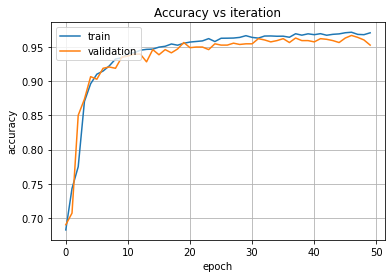

In [40]:
# Evaluate the model on the test data using `evaluate`
results = model.evaluate(X_test_3D_posed, y_test_onehot, batch_size=24)
print("test loss, test acc:", results)


# Plot the training and validation accuracies vs. epochs for the latest loop iteration
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs iteration')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# Save plot as PNG file
fig.savefig('Accuracy_Curves_LSTM.png')

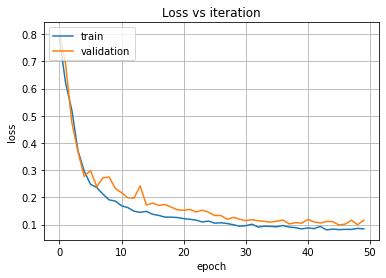

In [41]:
# Plot the training and validation losses vs. epochs for the latest loop iteration
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs iteration')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# Save plot as PNG file
fig.savefig('Loss_Curves_LSTM.png')

In [33]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test_3D_posed, verbose=0)
class_names = np.unique(y_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=class_names)
print(confmat)

[[882  40   0   2   0]
 [ 22 892   0   1   0]
 [  2   0 906   7   3]
 [  8   8  25 857  20]
 [  0   2  16  43 809]]


<AxesSubplot:>

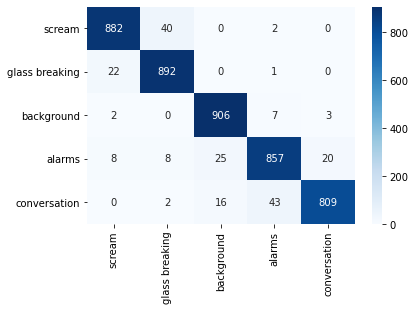

In [34]:
import seaborn as sns
categories = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
sns.heatmap(confmat, annot=True, fmt="d",cmap='Blues', xticklabels= categories, yticklabels=categories)

In [35]:
print('Misclassified samples: %d' % (y_test_pred != y_test).sum())

Misclassified samples: 199


In [36]:
from sklearn.metrics import classification_report
target_names = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                precision    recall  f1-score   support

        scream       0.96      0.95      0.96       924
glass breaking       0.95      0.97      0.96       915
    background       0.96      0.99      0.97       918
        alarms       0.94      0.93      0.94       918
  conversation       0.97      0.93      0.95       870

      accuracy                           0.96      4545
     macro avg       0.96      0.96      0.96      4545
  weighted avg       0.96      0.96      0.96      4545

